# EXAMPLE  AutoEncoder_MNIST_HighCompression#
### In this example I just want to illustrate the use of "transposedConvLayer" to make an Autoencoder. In this example Max Pool Layers are being used in order to obtain a grater compression.
#### Network ####
Input(28,28,1) - Conv(3,3)  - Maxp (2,2) - Conv(3,3) - Maxp(2,2) - Out (12,12,5) - 2xTransposedConv(2,2) - Output (28,28,1)
#### Note ####
Converges to a nice solution almost always

In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.3
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [3]:
# Load Mnist
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', version=1, cache=True)
trX, teX, trY, teY = train_test_split(mnist.data / 255.0, mnist.target.astype("int0"), test_size = 0.33)

# Data vectors are expected in columns
trX = trX.transpose();

In [4]:
# dataset properties
print("Values per Image:", trX.shape[0])
print("Number of images for training:", trX.shape[1])
from matplotlib import pyplot as plt
%matplotlib inline 

Values per Image: 784
Number of images for training: 46900


In [5]:
#subsample if necessary
trainSampleSize = 46900;
trXSub = trX[:,0:trainSampleSize]

In [6]:
# importlib.reload(pyb) # For some reason, this appears not to be working

In [7]:
deepAE = pyb.AutoEncoderExample6(28,28,1)


Conv In Depth: 1 In Height: 28 In Width: 28 Out Depth: 16 Out Height: 28 Out Width: 28
Maxp In Depth: 16 In Height: 28 In Width: 28 Out Depth: 16 Out Height: 14 Out Width: 14
Conv In Depth: 16 In Height: 14 In Width: 14 Out Depth: 4 Out Height: 14 Out Width: 14
Maxp In Depth: 4 In Height: 14 In Width: 14 Out Depth: 4 Out Height: 7 Out Width: 7
Tran In Depth: 4 In Height: 7 In Width: 7 Out Depth: 16 Out Height: 14 Out Width: 14
Tran In Depth: 16 In Height: 14 In Width: 14 Out Depth: 1 Out Height: 28 Out Width: 28


In [8]:
# train and test (prints some result and returns test results)
deepAE.Train(trXSub,trXSub,0.0005,10)

Loss of a given sample at epoch: 0
0.0069642
Loss of a given sample at epoch: 1
0.0116952
Loss of a given sample at epoch: 2
0.00769731
Loss of a given sample at epoch: 3
0.00568275
Loss of a given sample at epoch: 4
0.00420606
Loss of a given sample at epoch: 5
0.003365
Loss of a given sample at epoch: 6
0.00472882
Loss of a given sample at epoch: 7
0.00790123
Loss of a given sample at epoch: 8
0.00902099
Loss of a given sample at epoch: 9
0.00263508


testing:
784rows


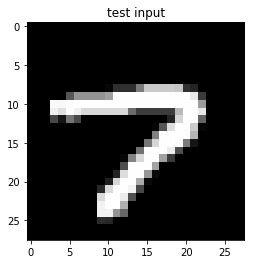

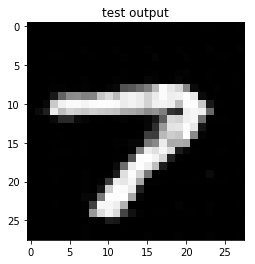

In [19]:
sampleNum = 9
deepAEOut = deepAE.Test(trXSub[:,sampleNum])
plt.title("test input")
plt.imshow(np.reshape(trXSub[:,sampleNum],(28,28)), interpolation='nearest', cmap='gray')
plt.show()
plt.title("test output")
plt.imshow(np.reshape(deepAEOut,(28,28)), interpolation='nearest', cmap='gray')
plt.show()

In [10]:
deepAEOut

array([[1.59934404e-03],
       [7.35093283e-04],
       [4.08135757e-04],
       [6.02613194e-04],
       [3.44199034e-03],
       [3.30890306e-03],
       [1.90799918e-03],
       [4.55670441e-03],
       [3.34695465e-03],
       [3.45534408e-03],
       [2.01145354e-03],
       [5.18929928e-03],
       [1.79461534e-03],
       [1.84269654e-03],
       [1.39107964e-03],
       [4.78053302e-03],
       [6.84047204e-04],
       [3.91840631e-04],
       [4.72561668e-04],
       [1.66066503e-03],
       [3.34695465e-03],
       [3.45534408e-03],
       [2.01145354e-03],
       [5.18929928e-03],
       [3.55770054e-03],
       [3.32830779e-03],
       [1.77316280e-03],
       [3.94755209e-03],
       [2.27732038e-06],
       [1.37553999e-08],
       [1.50495692e-04],
       [1.05647933e-04],
       [5.58731334e-06],
       [6.60149399e-08],
       [3.41221463e-04],
       [4.87304738e-04],
       [5.41128062e-06],
       [6.64684152e-08],
       [3.37898532e-04],
       [5.11822837e-04],
